<a href="https://colab.research.google.com/github/ruthetum/Deeplearning-NLP/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 (Artificial Neural Network)

활성화함수 : 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수

활성화함수는 비선형 함수를 사용해야 함

(선형 함수로 사용하면 y(x) = f(f(f(x))) 결국 다시 Wx+b 형태가 되버림)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 계단 함수

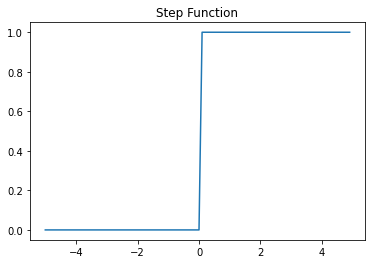

In [0]:
def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

# 2. 시그모이드 함수

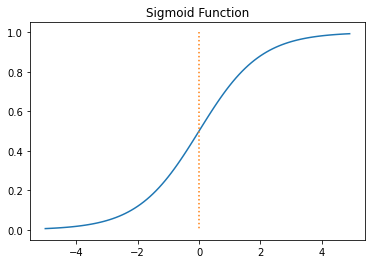

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선
plt.title('Sigmoid Function')
plt.show()

출력값이 0 또는 1에 가까워지면 기울기가 완만해짐

역전파 과정에서 0에 가까운 기울기가 곱해지면 기울기 값이 제대로 전달되지 않음

이걸 기울기 손실(Vanishing Gradient) 문제라고 함

출력층과 가까운 은닉층에는 기울기가 잘 전파되지만

앞단으로 갈수록 제대로 전파되지 않음

결론적으로 시그모이드 함수를 은닉층에 사용하는 것은 지양되어야 함

# 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function) 

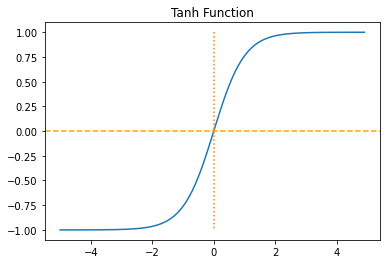

In [0]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

# 4. ReLU 함수

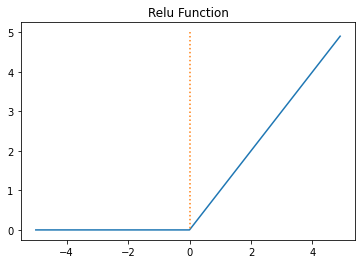

In [0]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

# 5. Leaky ReLU
* ReLU의 변형
* 음수일 때 0 이 아닌 0에 가까워지지만 0은 아닌 작은 수 반환

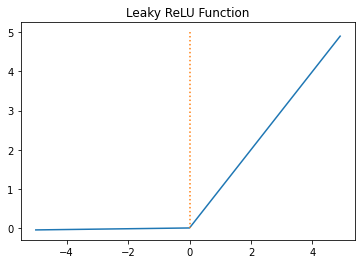

In [0]:
a = 0.01

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

# 6. Softmax 함수

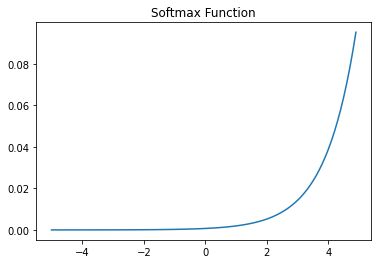

In [0]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# 보통 이런 식으로 Layer 구현

In [0]:
from keras.models import Sequential
from keras.layers import Dense

 # 층을 추가할 준비
model = Sequential()

# 입력층(4)과 다음 은닉층(8) 그리고 은닉층의 활성화 함수는 relu
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))

# 은닉층(8)의 활성화 함수는 relu
model.add(Dense(8, activation='relu'))
# 출력층(3)의 활성화 함수는 softmax
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.


RuntimeError: ignored